# Problem Statement
A retail company 'CABC Private Limited" wants to understand the customer
purchase behaviour (specifically, purchase amount) against various products of
different categories. They have shared purchase summary of various customers
for selected high volume prhducts from last month.
The data set also contains customer demographics (age, gender, marital status,
city_type, stay_in_current_city), product details (product_id and product
category) and Total purchase _ amount from last month.
Now, they want to build a model to predict the purchase amount of customer
a ainst various products which will help them to create personalized offer for customers against different products.

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Importing train data

In [201]:
df = pd.read_csv("train.csv")
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [202]:
df.shape

(550068, 12)

### Importing test data

In [203]:
test_df = pd.read_csv("test.csv")
test_df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [204]:
test_df.shape

(233599, 11)

### Append the test data to train data

In [205]:
df = pd.merge(df, test_df, how='outer') 
df.shape

(783667, 12)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [207]:
# dropping the User_ID column because it is not useful for our analysis
df.drop("User_ID", axis=1, inplace=True)    


## Data Preprocessing

### HAndling Categorical Feature Gender

In [208]:
df["Gender"] = df["Gender"].map({"F": 0, "M": 1})   
df["Gender"].value_counts()

Gender
1    590031
0    193636
Name: count, dtype: int64

### HAndling Categorical Feature Age
* Here age is a categorical ordinal feature
* We will use target ordinal encoding to encode the age feature

In [209]:
df["Age"]

0          0-17
1          0-17
2          0-17
3          0-17
4          0-17
          ...  
783662    26-35
783663    26-35
783664    26-35
783665    26-35
783666    26-35
Name: Age, Length: 783667, dtype: object

In [210]:
df["Age"] = df["Age"].map({"0-17": 1, "18-25": 2, "26-35": 3, "36-45": 4, "46-50": 5, "51-55": 6, "55+": 7})


In [211]:
df.sample(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
99067,P00101042,1,4,7,A,3,0,5,12.0,NaN,7138.0
359067,P00116842,1,3,0,C,4+,0,2,5.0,8.0,16270.0
321566,P00183942,1,4,14,C,1,0,3,4.0,NaN,10574.0
554406,P00208842,0,2,17,C,1,0,11,16.0,NaN,NaN
694333,P00127742,1,2,16,B,3,0,1,2.0,15.0,15824.0


### HAndling Categorical Feature City_Category
* Here city_category is a categorical nominal feature.


In [212]:
df["City_Category"].value_counts()  

City_Category
B    329739
C    243684
A    210244
Name: count, dtype: int64

In [213]:
city_encoded = pd.get_dummies(df["City_Category"], drop_first=True, dtype=int)

city_encoded.sample(5)


,B,C
689213,1,0
184927,0,0
2430,1,0
742867,1,0
138970,0,1


In [214]:
df = pd.concat([df, city_encoded], axis=1)  
df.drop("City_Category", axis=1, inplace=True)   # after encoding the city category, we can drop the original column
df.sample(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
637534,P00182442,1,2,2,1,1,5,11.0,NaN,5246.0,1,0
404167,P00238542,1,3,12,4+,0,5,14.0,NaN,3765.0,1,0
621786,P00173842,1,2,4,1,0,1,2.0,15.0,15204.0,0,1
535478,P00297042,1,7,13,0,0,8,NaN,NaN,NaN,0,1
84955,P00366542,1,2,2,2,0,5,NaN,NaN,8859.0,0,1


## Missing Values

In [215]:
df.isna().sum() * 100 / len(df)

Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
B                              0.000000
C                              0.000000
dtype: float64

<Axes: >

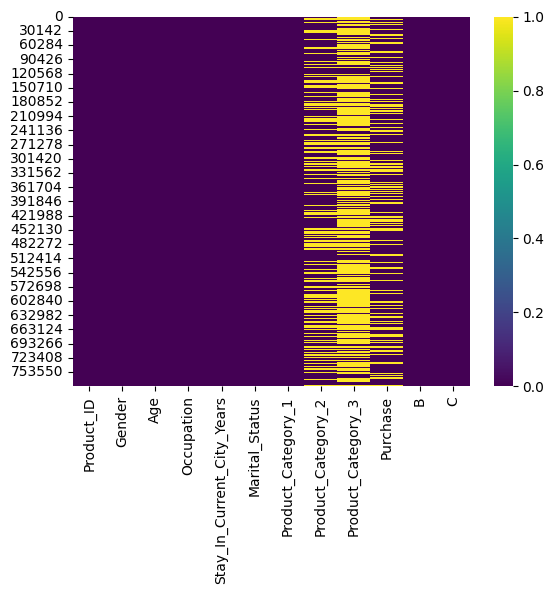

In [216]:
sns.heatmap(df.isna(), cmap="viridis")

In [217]:
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

### replace the missing values in the Product_Category_2 column with the mode of the column


In [218]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])
df["Product_Category_2"].isna().sum()   

0

In [219]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])
df["Product_Category_3"].isna().sum()   

0

## Converting cols to numeric

### converting the stay_in_current_city_years column to numerical

In [220]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [221]:
df["Stay_In_Current_City_Years"] = pd.to_numeric(df["Stay_In_Current_City_Years"].str.replace("+", ""), errors="coerce")
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1    276425
2    145427
3    135428
4    120671
0    105716
Name: count, dtype: int64

#### Age vs Purchase Amount ( hue = "Gender")

Text(0, 0.5, 'Purchases done')

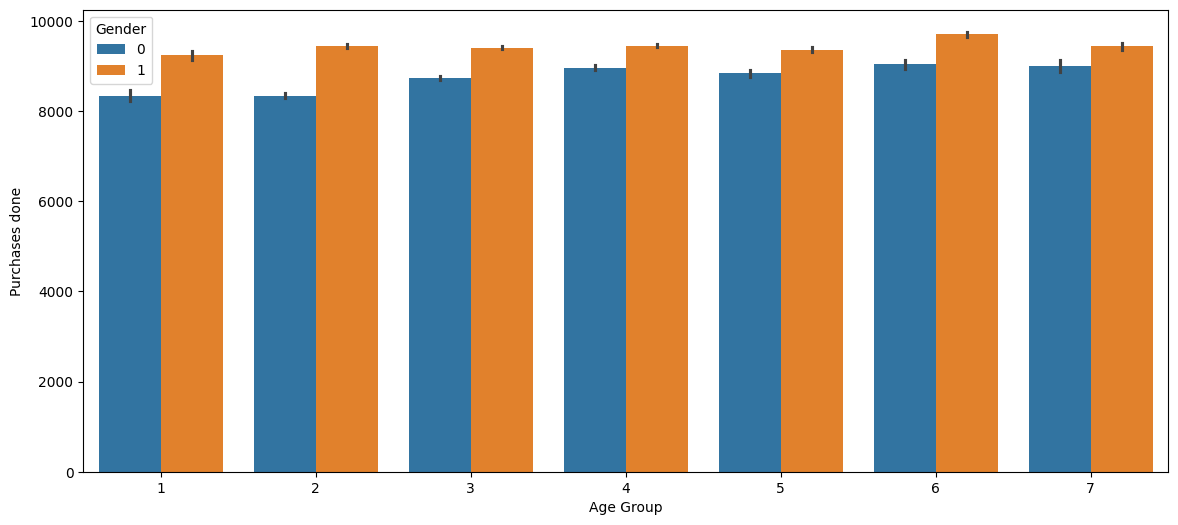

In [228]:
plt.figure(figsize=(14, 6))
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df) 
plt.xlabel("Age Group")
plt.ylabel("Purchases done")


#### Occupation vs Purchase Amount ( hue = "Gender")

Text(0, 0.5, 'Purchase')

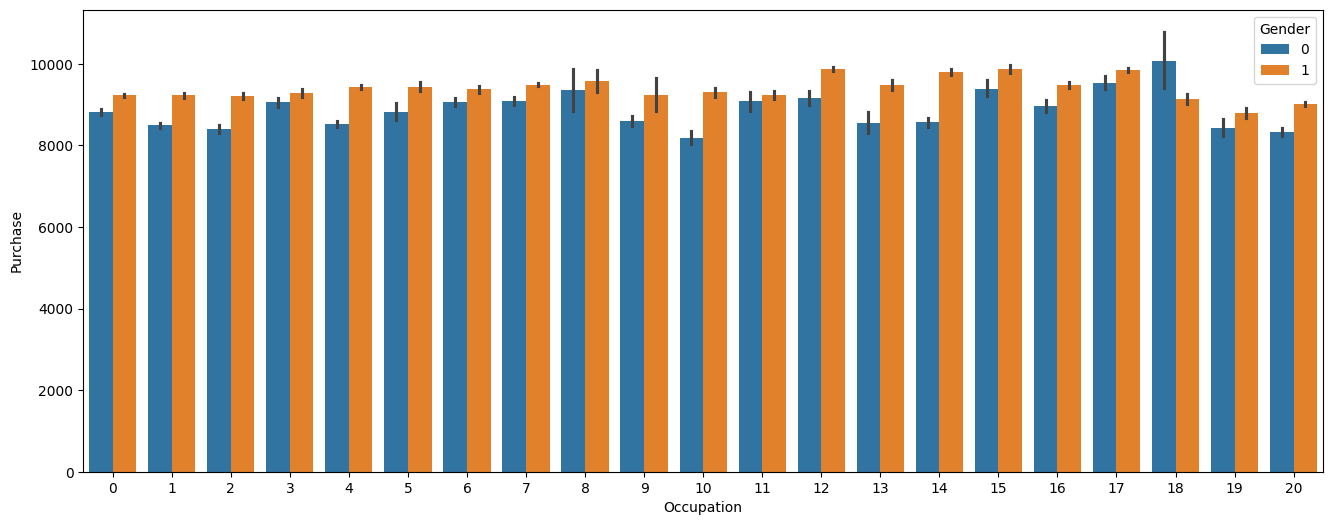

In [231]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Occupation", y="Purchase", hue="Gender", data=df) 
plt.xlabel("Occupation")
plt.ylabel("Purchase")


In [235]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64